In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
file1 = open("../../data/features/2019_05_16_TSLA_y_07_yishuang.pickle",'rb')
tsla = pickle.load(file1, encoding='utf-8')

In [4]:
tsla.head()

,Date,Daily_volume,Datetime,Hour_volume,Trading_Hour,Roll_volume,Moving_average_5,Volume_perc
0,2016-05-25,3126800,2016-05-25 13:30:00+00:00,772125.0,1,2623287.0,3082185.6,0.250512
1,2016-05-25,3126800,2016-05-25 14:30:00+00:00,706932.0,2,2764858.0,2925038.0,0.241683
2,2016-05-25,3126800,2016-05-25 15:30:00+00:00,271832.0,3,2754601.0,2839565.6,0.095730
3,2016-05-25,3126800,2016-05-25 16:30:00+00:00,288918.0,4,2776477.0,2771824.2,0.104234
4,2016-05-25,3126800,2016-05-25 17:30:00+00:00,440561.0,5,3071182.0,2798081.0,0.157451


In [5]:
tsla.shape[0]

5026

# design AR features

In [8]:
# tsla['Perc_shift_1'] = tsla['Volume_perc'].shift(1)
# tsla['Perc_shift_2'] = tsla['Volume_perc'].shift(2)
# tsla['Perc_shift_3'] = tsla['Volume_perc'].shift(3)
# tsla['Perc_shift_4'] = tsla['Volume_perc'].shift(4)
# tsla['Perc_shift_5'] = tsla['Volume_perc'].shift(5)
# tsla['Perc_shift_6'] = tsla['Volume_perc'].shift(6)
tsla['Perc_shift_7'] = tsla['Volume_perc'].shift(7)


In [9]:
tsla['Perc_shift_14'] = tsla['Volume_perc'].shift(14)
tsla['Perc_shift_21'] = tsla['Volume_perc'].shift(21)
tsla['Perc_shift_28'] = tsla['Volume_perc'].shift(28)
tsla['Perc_shift_35'] = tsla['Volume_perc'].shift(35)
tsla['Perc_shift_42'] = tsla['Volume_perc'].shift(42)
tsla['Perc_shift_49'] = tsla['Volume_perc'].shift(49)


In [10]:
tsla.dropna(inplace = True)

In [11]:
tsla.head()

,Date,Daily_volume,Datetime,Hour_volume,Trading_Hour,Roll_volume,Moving_average_5,Volume_perc,Perc_shift_7,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49
49,2016-06-06,2249500,2016-06-06 13:30:00+00:00,802995.0,1,2259026.0,2061368.8,0.389545,0.354588,0.191230,0.497019,0.129291,0.288979,0.333049,0.250512
50,2016-06-06,2249500,2016-06-06 14:30:00+00:00,279458.0,2,2269079.0,2128007.2,0.131324,0.135528,0.121435,0.274092,0.093569,0.162169,0.276517,0.241683
51,2016-06-06,2249500,2016-06-06 15:30:00+00:00,292325.0,3,2367919.0,2227041.6,0.131262,0.097377,0.082991,0.140525,0.074788,0.078377,0.151645,0.095730
52,2016-06-06,2249500,2016-06-06 16:30:00+00:00,170419.0,4,2382748.0,2287972.8,0.074485,0.078619,0.086119,0.081911,0.066586,0.059976,0.075488,0.104234
53,2016-06-06,2249500,2016-06-06 17:30:00+00:00,214303.0,5,2465211.0,2348796.6,0.091239,0.066954,0.091694,0.069936,0.078209,0.090399,0.085611,0.157451


In [ ]:
ar = tsla[['Volume_perc','Perc_shift_1', 'Perc_shift_2', 'Perc_shift_3', 'Perc_shift_4', 'Perc_shift_5', 'Perc_shift_6', 'Perc_shift_7']]


In [13]:
ar = tsla[['Volume_perc','Perc_shift_7', 'Perc_shift_14', 'Perc_shift_21', 'Perc_shift_28', 'Perc_shift_35', 'Perc_shift_42', 'Perc_shift_49']]


In [14]:
ar.reset_index(drop = True, inplace = True)

In [15]:
ar.corr()

,Volume_perc,Perc_shift_7,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49
Volume_perc,1.000000,0.060679,0.074323,0.071945,0.106254,0.076696,0.065537,0.063781
Perc_shift_7,0.060679,1.000000,0.060696,0.074482,0.071871,0.106360,0.076722,0.065505
Perc_shift_14,0.074323,0.060696,1.000000,0.060670,0.074385,0.071847,0.106259,0.076510
Perc_shift_21,0.071945,0.074482,0.060670,1.000000,0.060501,0.074562,0.072014,0.106276
Perc_shift_28,0.106254,0.071871,0.074385,0.060501,1.000000,0.060446,0.074355,0.071764
Perc_shift_35,0.076696,0.106360,0.071847,0.074562,0.060446,1.000000,0.060488,0.074286
Perc_shift_42,0.065537,0.076722,0.106259,0.072014,0.074355,0.060488,1.000000,0.060353
Perc_shift_49,0.063781,0.065505,0.076510,0.106276,0.071764,0.074286,0.060353,1.000000


# convert trading hour into dummy variable

In [16]:
Trading_Hour = pd.get_dummies(data= tsla['Trading_Hour'], drop_first = True)

In [17]:
tsla_new = pd.concat([Trading_Hour, tsla], axis = 1)

In [18]:
tsla_new.head()

,2,3,4,5,6,7,Date,Daily_volume,Datetime,Hour_volume,...,Roll_volume,Moving_average_5,Volume_perc,Perc_shift_7,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49
49,0,0,0,0,0,0,2016-06-06,2249500,2016-06-06 13:30:00+00:00,802995.0,...,2259026.0,2061368.8,0.389545,0.354588,0.191230,0.497019,0.129291,0.288979,0.333049,0.250512
50,1,0,0,0,0,0,2016-06-06,2249500,2016-06-06 14:30:00+00:00,279458.0,...,2269079.0,2128007.2,0.131324,0.135528,0.121435,0.274092,0.093569,0.162169,0.276517,0.241683
51,0,1,0,0,0,0,2016-06-06,2249500,2016-06-06 15:30:00+00:00,292325.0,...,2367919.0,2227041.6,0.131262,0.097377,0.082991,0.140525,0.074788,0.078377,0.151645,0.095730
52,0,0,1,0,0,0,2016-06-06,2249500,2016-06-06 16:30:00+00:00,170419.0,...,2382748.0,2287972.8,0.074485,0.078619,0.086119,0.081911,0.066586,0.059976,0.075488,0.104234
53,0,0,0,1,0,0,2016-06-06,2249500,2016-06-06 17:30:00+00:00,214303.0,...,2465211.0,2348796.6,0.091239,0.066954,0.091694,0.069936,0.078209,0.090399,0.085611,0.157451


In [19]:
tsla_new.rename(columns = {2:'Hour2', 3: 'Hour3', 4: 'Hour4', 5:'Hour5', 6:'Hour6', 7:'Hour7'}, inplace = True)


In [20]:
tsla_new.head()

,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Date,Daily_volume,Datetime,Hour_volume,...,Roll_volume,Moving_average_5,Volume_perc,Perc_shift_7,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49
49,0,0,0,0,0,0,2016-06-06,2249500,2016-06-06 13:30:00+00:00,802995.0,...,2259026.0,2061368.8,0.389545,0.354588,0.191230,0.497019,0.129291,0.288979,0.333049,0.250512
50,1,0,0,0,0,0,2016-06-06,2249500,2016-06-06 14:30:00+00:00,279458.0,...,2269079.0,2128007.2,0.131324,0.135528,0.121435,0.274092,0.093569,0.162169,0.276517,0.241683
51,0,1,0,0,0,0,2016-06-06,2249500,2016-06-06 15:30:00+00:00,292325.0,...,2367919.0,2227041.6,0.131262,0.097377,0.082991,0.140525,0.074788,0.078377,0.151645,0.095730
52,0,0,1,0,0,0,2016-06-06,2249500,2016-06-06 16:30:00+00:00,170419.0,...,2382748.0,2287972.8,0.074485,0.078619,0.086119,0.081911,0.066586,0.059976,0.075488,0.104234
53,0,0,0,1,0,0,2016-06-06,2249500,2016-06-06 17:30:00+00:00,214303.0,...,2465211.0,2348796.6,0.091239,0.066954,0.091694,0.069936,0.078209,0.090399,0.085611,0.157451


In [21]:
tsla_new.reset_index(inplace = True, drop = True)

In [22]:
from pandas.plotting import autocorrelation_plot

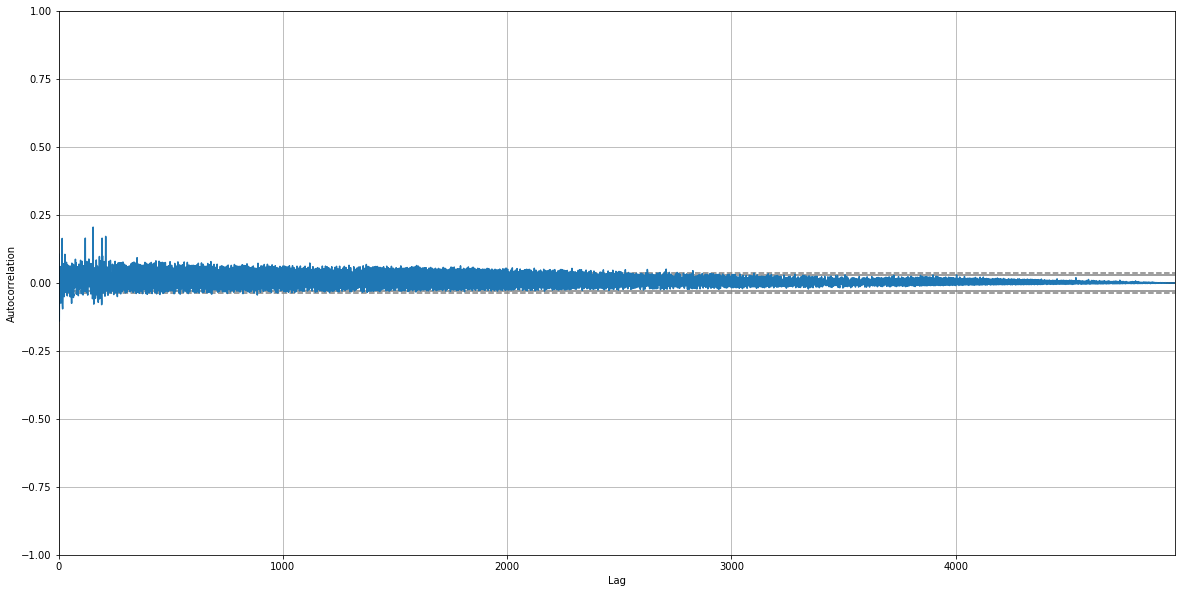

In [23]:
plt.figure(figsize=(20,10))
autocorrelation_plot(ar['Volume_perc'])

In [24]:
import statsmodels.api as sm

In [ ]:
X = tsla_new[["Perc_shift_1", "Perc_shift_2", "Perc_shift_3", "Perc_shift_4", "Perc_shift_5", "Perc_shift_6", "Perc_shift_7",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7"]]
y = tsla_new["Volume_perc"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


In [72]:
X = tsla_new[["Perc_shift_7", "Perc_shift_14", "Perc_shift_21", "Perc_shift_28", "Perc_shift_35", "Perc_shift_42", "Perc_shift_49",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7"]]
y = tsla_new["Volume_perc"]

X_train= X[:math.floor(0.9*len(X))]
y_train= y[:math.floor(0.9*len(X))]
X_test=X[math.floor(0.9*len(X)):]
y_test=y[math.floor(0.9*len(X)):]

model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Volume_perc   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 18 May 2019   Prob (F-statistic):          2.23e-285
Time:                        05:02:15   Log-Likelihood:                -183.80
No. Observations:                4479   AIC:                             393.6
Df Residuals:                    4466   BIC:                             476.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Perc_shift_7      0.0727      0.015      4.873      0.000       0.043       0.102
Perc_shift_14     0.0874      0.015      5.858      0.000       0.058       0.117
Perc_shift_21     0.0855      0.015      5.738      0.000       0.056       0.115
Perc_shift_28     0.1257      0.015      8.468      0.000       0.097       0.155
Perc_shift_35     0.0913      0.015      6.120      0.000       0.062       0.120
Perc_shift_42     0.0781      0.015      5.238      0.000       0.049       0.107
Perc_shift_49     0.0741      0.015      4.964      0.000       0.045       0.103
Hour2             0.0644      0.011      5.923      0.000       0.043       0.086
Hour3             0.0528      0.011      4.990      0.000       0.032       0.074
Hour4             0.0401      0.010      3.884      0.000       0.020       0.060
Hour5             0.0439      0.010      4.225      0.000       0.024       0.064
Hour6             0.0433      0.010      4.165      0.000       0.023       0.064
Hour7             0.0523      0.011      4.948      0.000       0.032       0.073
==============================================================================
Omnibus:                     8216.579   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16132842.315
Skew:                          13.361   Prob(JB):                         0.00
Kurtosis:                     295.799   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
import numpy as np

In [74]:
def r_square(y_train, y_test, predictions):
    average = np.mean(y_train)
    SSE = np.sum((y_test - predictions)**2)
    SST = np.sum((y_test - average)**2)
    r_2 = 1 - SSE/SST
    return r_2

In [75]:
r_square(y_train, y_test, predictions)

0.2552696601801796

In [27]:
tsla_new['AR_pred'] = predictions

In [38]:
tsla_new['Residual'] = tsla_new['Volume_perc'] - tsla_new['AR_pred']

In [39]:
tsla_new.shape[0]

4977

In [40]:
with open('../../data/features/2019_05_17_TSLA_y_08_yishuang.pickle', 'wb') as handle:
        pickle.dump(tsla_new, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
file1 = open("../../data/ml_model_predictions.pk",'rb')
pred = pickle.load(file1, encoding='utf-8')



In [31]:
pred['ar_y'] = tsla_new['AR_pred']

In [34]:
pred['Volume_perc'] = tsla_new['Volume_perc']

In [35]:
pred.head()

,id,Datetime,Trading_Hour,text,rf_y,xgb_y,ar_y,Volume_perc
29,1112123741574586368,2019-03-30 22:45:00+00:00,5.0,we’ve been so mired in production & logistics ...,0.133150,0.143107,0.178430,0.273073
30,1112106548363292672,2019-03-30 21:37:00+00:00,1.0,tesla semi delivering tesla carspic.twitter.co...,0.317403,0.317621,0.135968,0.122026
31,1112036985504317442,2019-03-30 17:00:00+00:00,6.0,"amazing work by tesla delivery teams, especial...",0.079927,0.065590,0.098531,0.088121
32,1111788218142216192,2019-03-30 00:32:00+00:00,7.0,retrofits will start when our software is able...,0.108647,0.109163,0.090778,0.128553
33,1111762533520531456,2019-03-29 22:50:00+00:00,1.0,anyone who purchased full self-driving will ge...,0.334823,0.325926,0.102728,0.063380


In [36]:
pred.shape[0]

720

In [25]:
X = tsla_new[["Perc_shift_7", "Perc_shift_14", "Perc_shift_21", "Perc_shift_28", "Perc_shift_35", "Perc_shift_42", "Perc_shift_49",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7"]]
y = tsla_new["Volume_perc"]

X_train= X[:math.floor(0.9*len(X))]
y_train= y[:math.floor(0.9*len(X))]
X_test=X[math.floor(0.9*len(X)):]
y_test=y[math.floor(0.9*len(X)):]
print(len(X),len(X_train),len(X_test))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
Xvif = X_train.drop(['Hour2', 'Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7'],1)

vif["VIF Factor"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
vif["features"] = Xvif.columns
vif

NameError: name 'math' is not defined

In [ ]:

lrmodel = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)     # instantiate
random_forest.fit(X_train, y_train)                         # fit

print("Random Forest R^2 training is: {}".format(random_forest.score(X_train, y_train)))                
print("Random Forest R^2 test data is: {}".format(random_forest.score(X_test, y_test)))

print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test)))))


In [ ]:
# tsla_new.Datetime.unique

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

y1 = tsla["Percentage_Volume"]

ax.plot(y1, color = 'cornflowerblue')


plt.show()

Stacking Model

In [41]:
file2 = open("../../data/features/../../data/2019_05_17_ml_model_predictions.pk",'rb')
stackfea = pickle.load(file2, encoding='utf-8')
print(tsla_new.columns)
tsla_new.head()


Index(['Hour2', 'Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7', 'Date',
       'Daily_volume', 'Datetime', 'Hour_volume', 'Trading_Hour',
       'Roll_volume', 'Moving_average_5', 'Volume_perc', 'Perc_shift_7',
       'Perc_shift_14', 'Perc_shift_21', 'Perc_shift_28', 'Perc_shift_35',
       'Perc_shift_42', 'Perc_shift_49', 'AR_pred', 'Residual'],
      dtype='object')


,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Date,Daily_volume,Datetime,Hour_volume,...,Volume_perc,Perc_shift_7,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49,AR_pred,Residual
0,0,0,0,0,0,0,2016-06-06,2249500,2016-06-06 13:30:00+00:00,802995.0,...,0.389545,0.354588,0.191230,0.497019,0.129291,0.288979,0.333049,0.250512,0.180036,0.209508
1,1,0,0,0,0,0,2016-06-06,2249500,2016-06-06 14:30:00+00:00,279458.0,...,0.131324,0.135528,0.121435,0.274092,0.093569,0.162169,0.276517,0.241683,0.174876,-0.043552
2,0,1,0,0,0,0,2016-06-06,2249500,2016-06-06 15:30:00+00:00,292325.0,...,0.131262,0.097377,0.082991,0.140525,0.074788,0.078377,0.151645,0.095730,0.113209,0.018052
3,0,0,1,0,0,0,2016-06-06,2249500,2016-06-06 16:30:00+00:00,170419.0,...,0.074485,0.078619,0.086119,0.081911,0.066586,0.059976,0.075488,0.104234,0.087077,-0.012592
4,0,0,0,1,0,0,2016-06-06,2249500,2016-06-06 17:30:00+00:00,214303.0,...,0.091239,0.066954,0.091694,0.069936,0.078209,0.090399,0.085611,0.157451,0.097929,-0.006690


In [42]:
tsla_new.head()
tsla.dtypes
[[x.Datetime.minute,30*math.ceil(x.Datetime.minute/30)] for i,x in stackfea.iterrows()]


NameError: name 'math' is not defined

In [43]:
import datetime
import math 

# stackfea['time'] = [datetime.datetime(x.Datetime.year, x.Datetime.month, x.Datetime.day, x.Datetime.hour, 30*math.floor(x.Datetime.minute/30) )-datetime.timedelta(hours=4) for i,x in stackfea.iterrows()]
stackfea['Date'] = [x.Datetime.date() for i,x in stackfea.iterrows()]
stackfea['Date'] = pd.to_datetime(stackfea['Date'])

# stackfea.groupby('time').mean()
print('stack result: ',len(stackfea),len(stackfea.groupby('Date').mean()))

stackfea.head()
stackfea.groupby(['Date','Trading_Hour']).mean().reset_index().head()


stack result:  720 333


,Date,Trading_Hour,rf_y,xgb_y
0,2016-07-18,2.0,0.244521,0.256178
1,2016-07-19,1.0,0.232681,0.189106
2,2016-07-20,1.0,0.332230,0.329306
3,2016-07-21,1.0,0.344160,0.354846
4,2016-07-21,6.0,0.168572,0.184710


In [44]:
tsla_new['Date'] = pd.to_datetime(tsla_new['Date'])
tsla_stack = pd.merge(tsla_new, stackfea.groupby('Date').mean().reset_index(), how='left', left_on=['Date','Trading_Hour'], right_on=['Date','Trading_Hour'])
print('All data: ',tsla_stack.rf_y.count(),tsla_stack.rf_y.isna().count())
tsla_stack= tsla_stack.fillna(0)
tsla_stack.head()


All data:  195 4977


/jet/var/python/lib/python3.6/site-packages/pandas/core/reshape/merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Date,Daily_volume,Datetime,Hour_volume,...,Perc_shift_14,Perc_shift_21,Perc_shift_28,Perc_shift_35,Perc_shift_42,Perc_shift_49,AR_pred,Residual,rf_y,xgb_y
0,0,0,0,0,0,0,2016-06-06,2249500,2016-06-06 13:30:00+00:00,802995.0,...,0.191230,0.497019,0.129291,0.288979,0.333049,0.250512,0.180036,0.209508,0.0,0.0
1,1,0,0,0,0,0,2016-06-06,2249500,2016-06-06 14:30:00+00:00,279458.0,...,0.121435,0.274092,0.093569,0.162169,0.276517,0.241683,0.174876,-0.043552,0.0,0.0
2,0,1,0,0,0,0,2016-06-06,2249500,2016-06-06 15:30:00+00:00,292325.0,...,0.082991,0.140525,0.074788,0.078377,0.151645,0.095730,0.113209,0.018052,0.0,0.0
3,0,0,1,0,0,0,2016-06-06,2249500,2016-06-06 16:30:00+00:00,170419.0,...,0.086119,0.081911,0.066586,0.059976,0.075488,0.104234,0.087077,-0.012592,0.0,0.0
4,0,0,0,1,0,0,2016-06-06,2249500,2016-06-06 17:30:00+00:00,214303.0,...,0.091694,0.069936,0.078209,0.090399,0.085611,0.157451,0.097929,-0.006690,0.0,0.0


In [ ]:
# X.xgb_y = [math.ceil(x["Volume_perc"]) for _,x in tsla_stack.iterrows()]

X = tsla_stack[["Perc_shift_7", "Perc_shift_14", "Perc_shift_21", "Perc_shift_28", "Perc_shift_35", "Perc_shift_42", "Perc_shift_49",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7",  "xgb_y"]].fillna(0)
# X.xgb_y = [math.ceil(x["Volume_perc"]) for _,x in tsla_stack.iterrows()]

y = tsla_stack["Volume_perc"]
X_train= X[:math.floor(0.9*len(X))]
y_train= y[:math.floor(0.9*len(X))]
X_test=X[math.floor(0.9*len(X)):]
y_test=y[math.floor(0.9*len(X)):]
print(len(X),len(X_train),len(X_test))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
Xvif = X_train.drop(['Hour2', 'Hour3', 'Hour4', 'Hour5', 'Hour6', 'Hour7'],1)

vif["VIF Factor"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
vif["features"] = Xvif.columns
vif



In [ ]:

newmodel = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

# model = sm.OLS(y, X ).fit()
# predictions = model.predict(X ) # make the predictions by the model

# # Print out the statistics
# model.summary()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Random Forest
stack_random_forest = RandomForestRegressor(n_estimators=100)     # instantiate
stack_random_forest.fit(X_train, y_train)                         # fit

print("Random Forest R^2 training is: {}".format(random_forest.score(X_train, y_train)))                
print("Random Forest R^2 test data is: {}".format(random_forest.score(X_test, y_test)))

print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test)))))


In [ ]:
def bootstrap(metric, df_X, df_Y):
    modellist = [lrmodel,random_forest, stack_random_forest]
    modelname = ['Without Stacking Features (LR)','Without Stacking Features (RF)','With Stacking Features (RF)']  

    boot_n = [20, 100, 300, 500, 1000]
    bootstrap = pd.DataFrame(columns=['size','model','mean','sd','CI','LB','UB'])
    err = pd.DataFrame(columns=['size','model','mse'])

    for n in boot_n:
        errors   = np.zeros((n, len(modellist)))
        for b in range(0,n):
            for i,model in enumerate(modellist):
                index = np.random.choice(list(range(0,len(df_X))),len(df_X), replace=True)
                errors[b,i] = metric(df_Y.iloc[index], model.predict(df_X.iloc[index]))
                err = err.append(pd.DataFrame([{'size': n, 'model' : modelname[i],'metric' : errors[b,i]  }])) 

        bootstrapres = pd.DataFrame({'size': n, 'model' : modelname,'mean' : errors.mean(axis=0) ,'sd' : np.std(errors, axis=0)})
        #     print(bootstrapres)
        bootstrapres['CI'] = [ 1.96* b[3] for _,b in bootstrapres.iterrows()]
        bootstrapres['LB'] = [b[2] - 1.96* b[3] for _,b in bootstrapres.iterrows()]
        bootstrapres['UB'] = [b[2] + 1.96* b[3] for _,b in bootstrapres.iterrows()]

        bootstrap = bootstrap.append(bootstrapres) 
    return bootstrap

In [ ]:
modellist = [lrmodel,random_forest, stack_random_forest]
modelname = ['Without Stacking Features (LR)','Without Stacking Features (RF)','With Stacking Features (RF)']  
 

boot = [20, 100, 300, 500, 1000]
from sklearn.metrics import mean_absolute_error

bootstrap = pd.DataFrame(columns=['size','model','mean','sd','CI','LB','UB'])
err = pd.DataFrame(columns=['size','model','mse'])
for n in boot:
    errors   = np.zeros((n, len(modellist)))
    
    for b in range(0,n):
        for i,model in enumerate(modellist):
            index = np.random.choice(list(range(0,len(X_test))),len(X_test), replace=True)
            errors[b,i] = mean_absolute_error(y_test.iloc[index], model.predict(X_test.iloc[index]))
            err = err.append(pd.DataFrame([{'size': n, 'model' : modelname[i],'mse' : errors[b,i]  }])) 
            
    bootstrapres = pd.DataFrame({'size': n, 'model' : modelname,'mean' : errors.mean(axis=0) ,'sd' : np.std(errors, axis=0)})
#     print(bootstrapres)
    bootstrapres['CI'] = [ 1.96* b[3] for _,b in bootstrapres.iterrows()]
    bootstrapres['LB'] = [b[2] - 1.96* b[3] for _,b in bootstrapres.iterrows()]
    bootstrapres['UB'] = [b[2] + 1.96* b[3] for _,b in bootstrapres.iterrows()]
    
    bootstrap = bootstrap.append(bootstrapres) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(bootstrap)
import seaborn as sns
ax = sns.lineplot(x="size", y="mse",
             hue="model",ci='sd', 
             data=err)
# ax.fill_between(bootstrap.size, bootstrap.LB, bootstrap.UB, color='#888888', alpha=0.2)

plt.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#print(bootstrap)
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.lineplot(x="size", y="mean",
             hue="model",ci='sd', 
             data=err)
# ax.set_ylim(0.2,0.7);